<a href="https://colab.research.google.com/github/AvichalTrivedi7/Generative-AI-Intel-Unnati/blob/main/Vectorization_(OHE%2C_BOW%2C_N_Grams%2C_TF_IDF%2C_Word_Embeddings)_Gen_AI_Practice_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🥗 NLP Vectorization Techniques for Restaurant Reviews

### Scenario
You are analyzing restaurant feedback.  
The goal is to **convert text reviews into numerical representations** so that a computer can process them.  
Different techniques capture different aspects of the text, from simple word presence to semantic similarity.

---

### 1️⃣ One-Hot Encoding (Binary Word Presence)
**Goal:** Identify whether a word appears in a review, ignoring frequency.  
- `0` → Word is **absent**  
- `1` → Word is **present**  

**When to use:** When the **presence of a word** matters more than how often it occurs.

**Approach:** Use `CountVectorizer(binary=True)` from `scikit-learn` to create a matrix where:  
- Each **column** = a word  
- Each **row** = a review  

---

### 2️⃣ Bag-of-Words (BOW)
**Goal:** Represent reviews by **frequency counts of words**.  

**When to use:** When the **number of times a word appears** is important (e.g., for sentiment analysis).

**Approach:** Use `CountVectorizer(binary=False)` to create a matrix where:  
- Each **column** = a word  
- Each **row** = a review  
- Each **cell** = number of times the word appears

---

### 3️⃣ N-Grams
**Goal:** Capture **sequences of words** instead of single words.  

**When to use:** When context matters, such as “not good” or “great service”.

**Approach:** Use `CountVectorizer(ngram_range=(n, n))` to create a matrix where:  
- Each **column** = an n-gram (sequence of n words)  
- Each **row** = a review  
- Each **cell** = count or presence of that n-gram

---

### 4️⃣ TF-IDF (Term Frequency – Inverse Document Frequency)
**Goal:** Identify words that are **important in a review** but **not too common across all reviews**.  

**When to use:** When you want to **highlight meaningful words** and downweight common words like “food” or “service” if they appear everywhere.

**Approach:** Use `TfidfVectorizer()` to create a matrix where:  
- Each **column** = a word  
- Each **row** = a review  
- Each **cell** = weighted score reflecting word importance  

---

### 5️⃣ Word Embeddings (Word2Vec)
**Goal:** Represent words as **dense vectors** that capture **semantic meaning**.  

**When to use:** When you want to capture **word similarity** or **contextual meaning** beyond simple counts.

**Approach:**  
- Use `Word2Vec` from Gensim on tokenized reviews  
- Each word is represented as a vector in **continuous space**  
- Similar words have **vectors close to each other**  

**Example:** “food” and “meal” will have similar vectors, allowing models to understand their similarity.

---

### Preprocessing Notes
Before applying any technique:  
1. **Lowercase all text**  
2. **Remove punctuation**  
3. **Remove stopwords** (common words like “the”, “was”, “and”) to reduce noise  

---

### Summary Table

| Technique | Captures | Values | Use-case |
|-----------|---------|--------|----------|
| One-Hot Encoding | Presence/absence of words | 0 / 1 | Simple models, feature presence |
| Bag-of-Words (BOW) | Frequency of words | Counts | Text classification, sentiment analysis |
| N-Grams | Word sequences | Counts or binary | Context-dependent words, phrases |
| TF-IDF | Importance of words | Weighted scores | Highlight key words, downweight common words |
| Word Embeddings | Semantic similarity | Dense vectors | Similarity, contextual meaning, NLP models |

---

**Next Steps for Students:**  
- Apply these techniques to a **small restaurant review dataset**  
- Visualize the differences in **matrix size** and **values**  
- Explore using these representations in **simple sentiment classification**


## Step 1 — Dataset acquisition (create & inspect)
We create a small dataset (12 reviews). This is the starting point students will work with.


In [1]:
# Step 1: Dataset creation
import pandas as pd

# List of 12 restaurant reviews
reviews = [
    "The food was delicious and the pasta was perfect!",   # positive
    "Service was slow, had to wait 30 minutes.",           # negative
    "I loved the ambience — very cozy and calm.",          # positive
    "Food was not good, it was undercooked.",              # negative
    "The staff was friendly and welcoming.",               # positive
    "Prices are a bit pricey but worth it for the taste.", # mixed
    "Horrible experience. Will not recommend.",            # negative
    "Great service, great food, will come again!",         # positive
    "Portions are small but the flavor is amazing.",       # mixed-positive
    "The restaurant was crowded and noisy.",               # negative
    "Clean place, fast service, good value for money.",    # positive
    "Dessert was okay; expected better presentation.",     # mixed
    "The chicken was raw and tasted awful.",               # negative
    "Fantastic place! Highly recommend to everyone.",      # positive
    "The chairs were uncomfortable and tables dirty.",     # negative
    "Soup was bland and lacked seasoning.",                # negative
    "The drinks were refreshing and beautifully served.",  # positive
    "Too expensive for the portion sizes offered.",        # negative
    "Loved the live music and cheerful atmosphere.",       # positive
    "Waiter ignored us, very bad service.",                # negative
]


# Convert the list into a DataFrame for easy manipulation
df = pd.DataFrame({'review': reviews})

# Display the dataset
df.head(12)


,review
0,The food was delicious and the pasta was perfect!
1,"Service was slow, had to wait 30 minutes."
2,I loved the ambience — very cozy and calm.
3,"Food was not good, it was undercooked."
4,The staff was friendly and welcoming.
5,Prices are a bit pricey but worth it for the t...
6,Horrible experience. Will not recommend.
7,"Great service, great food, will come again!"
8,Portions are small but the flavor is amazing.
9,The restaurant was crowded and noisy.


## Step 2 — Preprocessing & Stopwords Removal

- Lowercase all text  
- Remove punctuation  
- Remove stopwords using NLTK


In [2]:
# Step 2: Import NLTK stopwords
import nltk
nltk.download('stopwords')  # Download stopwords list
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))  # Set of English stopwords
negation_words = {"not", "no", "never"}   # words to keep
custom_stopwords = stop_words - negation_words

# Step 2b: Define preprocessing function
import re
def preprocess(text):
    text = text.lower()  # Convert text to lowercase
    text = re.sub(r"[-—]", " ", text)  # Replace dash characters with space
    text = re.sub(r"[^a-z0-9\s]", "", text)  # Remove punctuation (keep letters/numbers/spaces)
    text = re.sub(r"\s+", " ", text).strip()  # Remove extra spaces
    tokens = [t for t in text.split() if t not in custom_stopwords]  # Remove stopwords
    return " ".join(tokens), tokens  # Return cleaned string and token list

# Apply preprocessing to all reviews
df['clean'], df['tokens'] = zip(*df['review'].apply(preprocess))

# Display cleaned reviews and tokens
df[['review','clean','tokens']].head(12)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,review,clean,tokens
0,The food was delicious and the pasta was perfect!,food delicious pasta perfect,"[food, delicious, pasta, perfect]"
1,"Service was slow, had to wait 30 minutes.",service slow wait 30 minutes,"[service, slow, wait, 30, minutes]"
2,I loved the ambience — very cozy and calm.,loved ambience cozy calm,"[loved, ambience, cozy, calm]"
3,"Food was not good, it was undercooked.",food not good undercooked,"[food, not, good, undercooked]"
4,The staff was friendly and welcoming.,staff friendly welcoming,"[staff, friendly, welcoming]"
5,Prices are a bit pricey but worth it for the t...,prices bit pricey worth taste,"[prices, bit, pricey, worth, taste]"
6,Horrible experience. Will not recommend.,horrible experience not recommend,"[horrible, experience, not, recommend]"
7,"Great service, great food, will come again!",great service great food come,"[great, service, great, food, come]"
8,Portions are small but the flavor is amazing.,portions small flavor amazing,"[portions, small, flavor, amazing]"
9,The restaurant was crowded and noisy.,restaurant crowded noisy,"[restaurant, crowded, noisy]"


In [3]:
from sklearn.feature_extraction.text import CountVectorizer

## Step 3 — One-Hot Encoding

- Each column = a word  
- Each row = review  
- 1 if word is present, 0 if absent


In [4]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer with binary=True for One-Hot encoding
vectorizer_oh = CountVectorizer(binary=True)

# Fit the vectorizer on cleaned reviews and transform reviews into a matrix
X_oh = vectorizer_oh.fit_transform(df['clean'])

# Convert the sparse matrix to a DataFrame for easy viewing
onehot_df = pd.DataFrame(X_oh.toarray(), columns=vectorizer_oh.get_feature_names_out())
onehot_df.index = [f"rev_{i}" for i in range(len(onehot_df))]  # Label rows as rev_0, rev_1...
display(onehot_df.head(12))


,30,amazing,ambience,atmosphere,awful,bad,beautifully,better,bit,bland,...,taste,tasted,uncomfortable,undercooked,us,value,wait,waiter,welcoming,worth
rev_0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
rev_1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
rev_2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
rev_3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
rev_4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
rev_5,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
rev_6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
rev_7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
rev_8,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
rev_9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Step 4 — Bag-of-Words (BOW)

- Each cell = frequency of word in review  
- Stopwords already removed


In [5]:
# Initialize CountVectorizer for BOW (frequency counts)
vectorizer_bow = CountVectorizer( )

# Fit and transform the cleaned reviews into BOW matrix
X_bow = vectorizer_bow.fit_transform(df['clean'])

# Convert to DataFrame for better readability
bow_df = pd.DataFrame(X_bow.toarray(), columns=vectorizer_bow.get_feature_names_out())
bow_df.index = [f"rev_{i}" for i in range(len(bow_df))]
display(bow_df.head(12))


,30,amazing,ambience,atmosphere,awful,bad,beautifully,better,bit,bland,...,taste,tasted,uncomfortable,undercooked,us,value,wait,waiter,welcoming,worth
rev_0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
rev_1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
rev_2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
rev_3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
rev_4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
rev_5,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
rev_6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
rev_7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
rev_8,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
rev_9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Top 50 frequent words in reviews:

service          4
food             3
loved            2
great            2
good             2
place            2
not              2
recommend        2
pasta            1
perfect          1
okay             1
offered          1
refreshing       1
portion          1
portions         1
presentation     1
prices           1
pricey           1
noisy            1
raw              1
restaurant       1
money            1
tasted           1
welcoming        1
waiter           1
wait             1
value            1
us               1
undercooked      1
uncomfortable    1
taste            1
seasoning        1
tables           1
staff            1
soup             1
small            1
slow             1
sizes            1
served           1
music            1
30               1
minutes          1
amazing          1
cozy             1
come             1
clean            1
chicken          1
cheerful         1
chairs           1
calm             1
dtype: int64


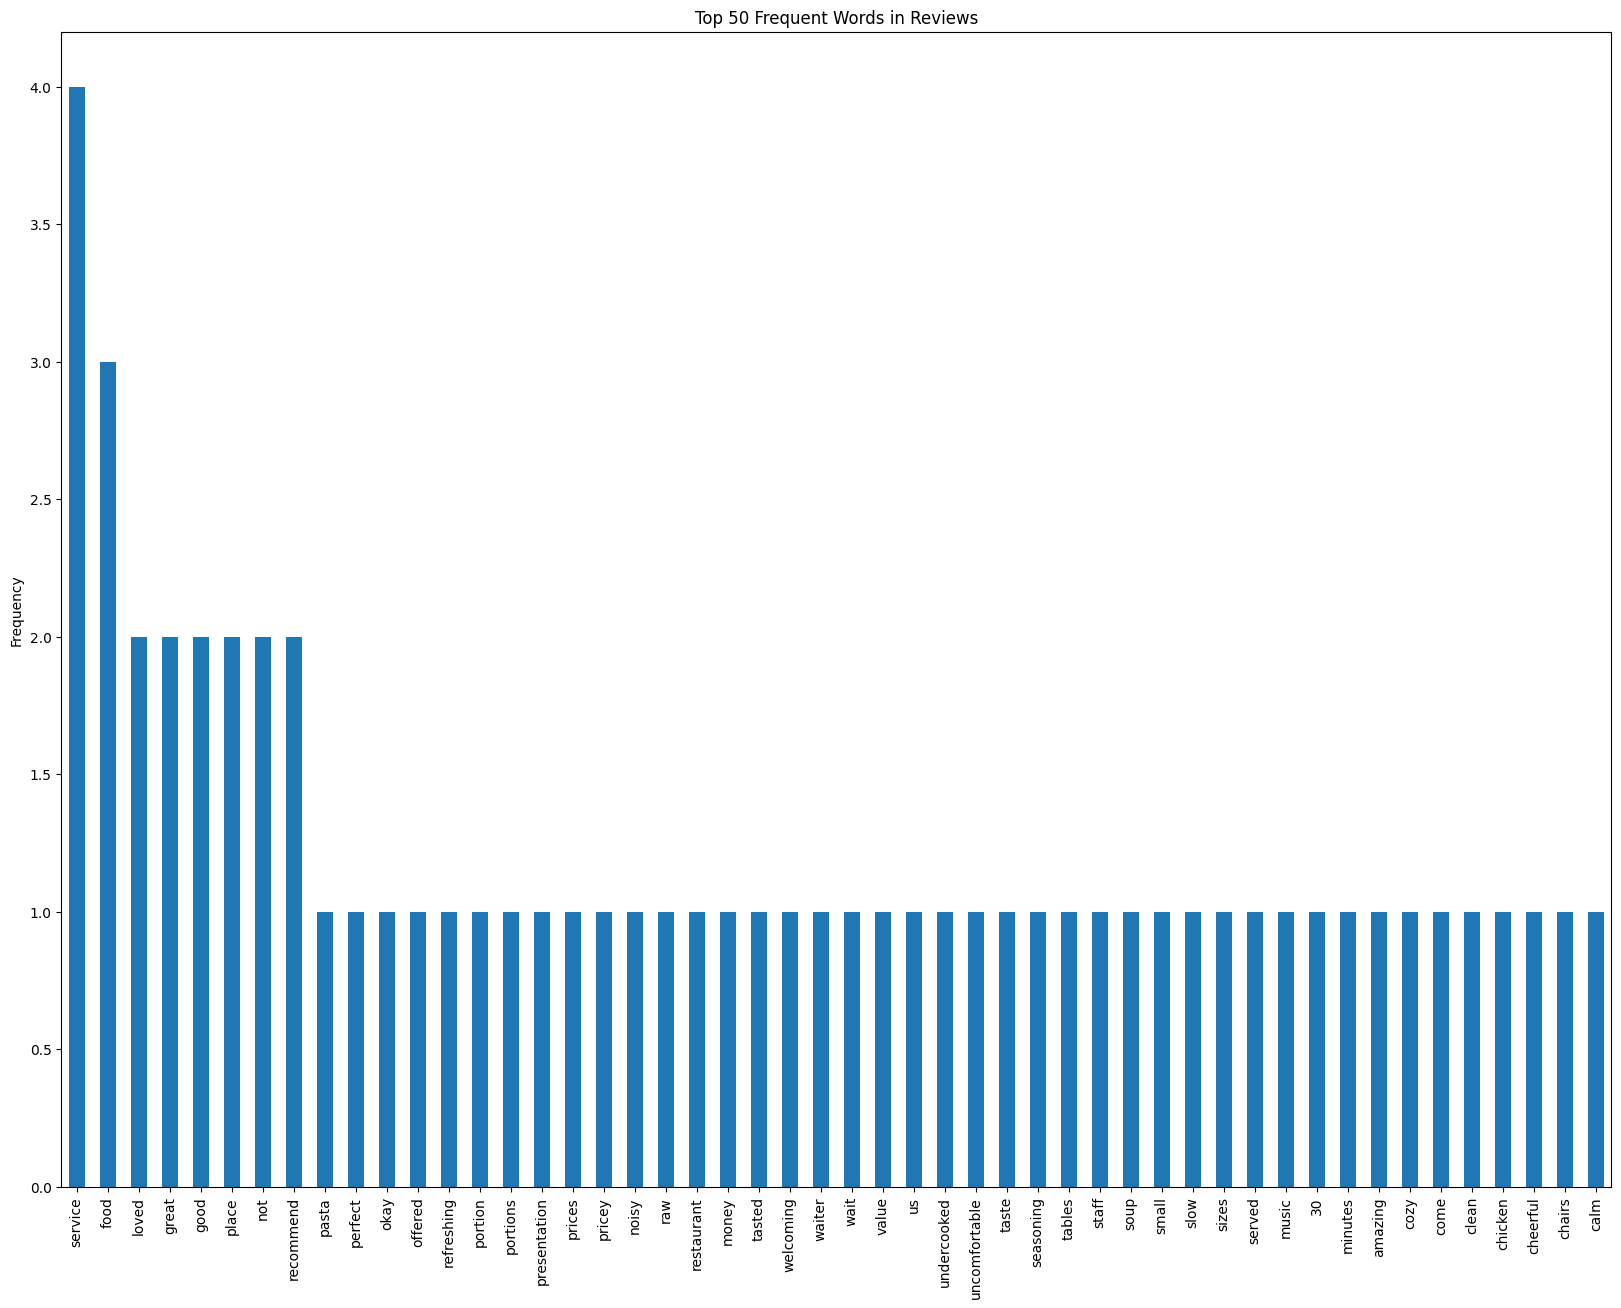

In [6]:
# Sum up the counts of each word across all reviews
word_counts = bow_df.sum(axis=0)

# Sort words by frequency in descending order
sorted_word_counts = word_counts.sort_values(ascending=False)

# Display top N words (e.g., top 50)
top_n = 50
print(f"Top {top_n} frequent words in reviews:\n")
print(sorted_word_counts.head(top_n))

# Optional: visualize with bar chart
import matplotlib.pyplot as plt

sorted_word_counts.head(top_n).plot(kind='bar', figsize=(20,15))
plt.title(f"Top {top_n} Frequent Words in Reviews")
plt.ylabel("Frequency")
plt.show()


In [7]:
word_counts

,0
30,1
amazing,1
ambience,1
atmosphere,1
awful,1
...,...
value,1
wait,1
waiter,1
welcoming,1


## Step 5 — N-Grams (Bigrams)

- Capture sequences of words  
- Example: "not good" or "great service"


In [8]:
# Initialize CountVectorizer for bigrams (2-word sequences)
vectorizer_bi = CountVectorizer(max_features=15,binary=True,ngram_range=(2,2))  # Only bigrams

# Fit and transform cleaned reviews into bigram matrix
X_bi = vectorizer_bi.fit_transform(df['clean'])

# Convert to DataFrame for readability
bigrams_df = pd.DataFrame(X_bi.toarray(), columns=vectorizer_bi.get_feature_names_out())
bigrams_df.index = [f"rev_{i}" for i in range(len(bigrams_df))]
display(bigrams_df.head(12))


,30 minutes,loved live,music cheerful,not good,not recommend,okay expected,pasta perfect,place fast,place highly,portion sizes,portions small,prices bit,pricey worth,raw tasted,recommend everyone
rev_0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
rev_1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
rev_2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
rev_3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
rev_4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
rev_5,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
rev_6,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
rev_7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
rev_8,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
rev_9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Step 6 — TF-IDF

- Term Frequency – Inverse Document Frequency  
- Highlights words important in a review but not too common across all reviews


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
vectorizer_tfidf = TfidfVectorizer()

# Fit and transform cleaned reviews into TF-IDF matrix
X_tfidf = vectorizer_tfidf.fit_transform(df['clean'])

# Convert to DataFrame
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=vectorizer_tfidf.get_feature_names_out())
tfidf_df.index = [f"rev_{i}" for i in range(len(tfidf_df))]
display(tfidf_df.head(12))


,30,amazing,ambience,atmosphere,awful,bad,beautifully,better,bit,bland,...,taste,tasted,uncomfortable,undercooked,us,value,wait,waiter,welcoming,worth
rev_0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.00000,0.000000
rev_1,0.469948,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.469948,0.0,0.00000,0.000000
rev_2,0.000000,0.0,0.514844,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.00000,0.000000
rev_3,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.561261,0.0,0.000000,0.000000,0.0,0.00000,0.000000
rev_4,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.57735,0.000000
rev_5,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.447214,0.0,...,0.447214,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.00000,0.447214
rev_6,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.00000,0.000000
rev_7,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.00000,0.000000
rev_8,0.000000,0.5,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.00000,0.000000
rev_9,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.00000,0.000000


## Step 7 — Word Embeddings (Word2Vec)

- Represents words in a continuous vector space  
- Captures semantic similarity and context


In [10]:
# Install gensim
!pip install gensim

from gensim.models import Word2Vec


In [11]:

# Train Word2Vec model on tokenized reviews
w2v_model = Word2Vec(
    sentences=df['tokens'],   # tokenized reviews
    vector_size=50,           # size of word vectors
    window=3,                 # context window
    min_count=1,              # ignore words appearing less than 1 time
    workers=2,                # number of CPU cores
    seed=42                   # for reproducibility
)

# Example: get vector for the word 'food'
print("Vector for 'food':\n", w2v_model.wv['food'])

# Example: find words most similar to 'food'
print("\nMost similar to 'food':")
w2v_model.wv.most_similar('food', topn=5)


Vector for 'food':
 [ 1.03959776e-02 -1.22144530e-02 -5.44375880e-03 -1.33116008e-03
 -8.83388493e-05 -1.82478502e-02  1.86277868e-03 -1.38284210e-02
  9.73503571e-03  7.32195610e-03  1.69011112e-02  9.79048479e-03
 -5.33429394e-03  1.87003873e-02 -3.56598618e-03 -6.96698669e-03
  1.62214302e-02 -5.18161291e-03 -1.69462729e-02 -1.21776818e-03
  1.18271969e-02 -1.24211479e-02 -1.48237939e-03 -1.48031404e-02
  7.45912781e-03 -9.71803674e-04 -6.79214718e-03 -1.09236268e-02
  2.57999427e-03  6.79255975e-03  1.76122431e-02 -2.51392368e-03
 -1.35724731e-02  1.33071253e-02  5.19057037e-03  8.01060162e-03
 -1.61109343e-02 -7.50533585e-03  1.07137561e-02  1.32903913e-02
 -2.59133335e-03  1.21905729e-02  1.36676738e-02 -4.50086594e-03
  1.59235056e-02 -8.46687797e-03 -1.04176905e-02  7.29981903e-03
  5.47047146e-03 -1.44099025e-02]

Most similar to 'food':


[('flavor', 0.3310183584690094),
 ('offered', 0.2509840428829193),
 ('taste', 0.24932211637496948),
 ('us', 0.24849186837673187),
 ('highly', 0.2397451251745224)]

In [12]:
# Train Word2Vec model using CBOW (sg=0)
w2v_model_cbow = Word2Vec(
    sentences=df['tokens'],   # tokenized reviews
    vector_size=50,           # size of word vectors
    window=3,                 # context window
    min_count=1,              # ignore words appearing less than 1 time
    workers=2,                # number of CPU cores
    seed=42,                  # for reproducibility
    sg=0                      # 0 for CBOW, 1 for Skip-gram (default)
)

# Example: get vector for the word 'food' using the CBOW model
print("Vector for 'food' (CBOW):\n", w2v_model_cbow.wv['food'])

# Example: find words most similar to 'food' using the CBOW model
print("\nMost similar to 'food' (CBOW):")
w2v_model_cbow.wv.most_similar('food', topn=5)

Vector for 'food' (CBOW):
 [ 1.03959776e-02 -1.22144530e-02 -5.44375880e-03 -1.33116008e-03
 -8.83388493e-05 -1.82478502e-02  1.86277868e-03 -1.38284210e-02
  9.73503571e-03  7.32195610e-03  1.69011112e-02  9.79048479e-03
 -5.33429394e-03  1.87003873e-02 -3.56598618e-03 -6.96698669e-03
  1.62214302e-02 -5.18161291e-03 -1.69462729e-02 -1.21776818e-03
  1.18271969e-02 -1.24211479e-02 -1.48237939e-03 -1.48031404e-02
  7.45912781e-03 -9.71803674e-04 -6.79214718e-03 -1.09236268e-02
  2.57999427e-03  6.79255975e-03  1.76122431e-02 -2.51392368e-03
 -1.35724731e-02  1.33071253e-02  5.19057037e-03  8.01060162e-03
 -1.61109343e-02 -7.50533585e-03  1.07137561e-02  1.32903913e-02
 -2.59133335e-03  1.21905729e-02  1.36676738e-02 -4.50086594e-03
  1.59235056e-02 -8.46687797e-03 -1.04176905e-02  7.29981903e-03
  5.47047146e-03 -1.44099025e-02]

Most similar to 'food' (CBOW):


[('flavor', 0.3310183584690094),
 ('offered', 0.2509840428829193),
 ('taste', 0.24932211637496948),
 ('us', 0.24849186837673187),
 ('highly', 0.2397451251745224)]

## Step 8 — Visualization of Top Words

We will create bar charts to visualize the most frequent / important words:

- One-Hot → sum of 1s across reviews (presence count)  
- BOW → total frequency across reviews  
- TF-IDF → average TF-IDF score per word  
- Word2Vec → similarity heatmap for selected words


/tmp/ipython-input-3790462942.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_words.values, y=top_words.index, palette="viridis")


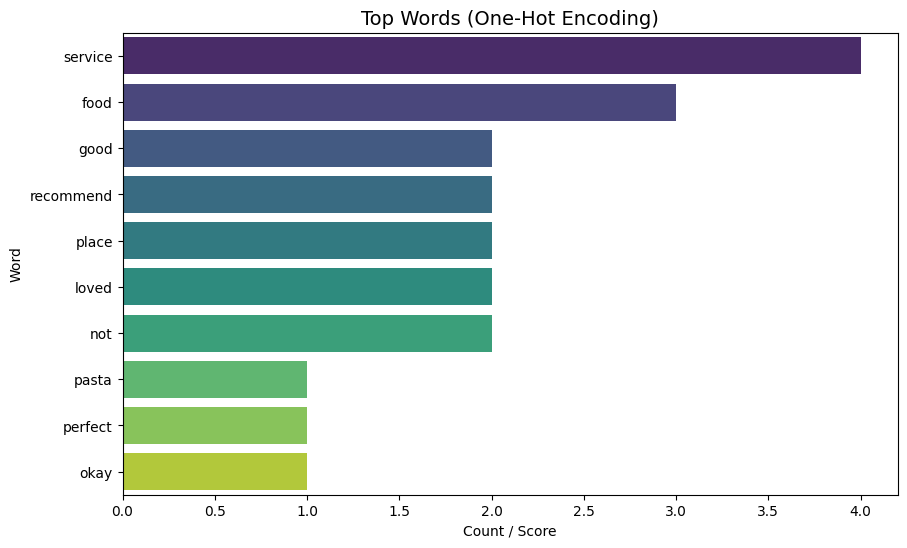

/tmp/ipython-input-3790462942.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_words.values, y=top_words.index, palette="viridis")


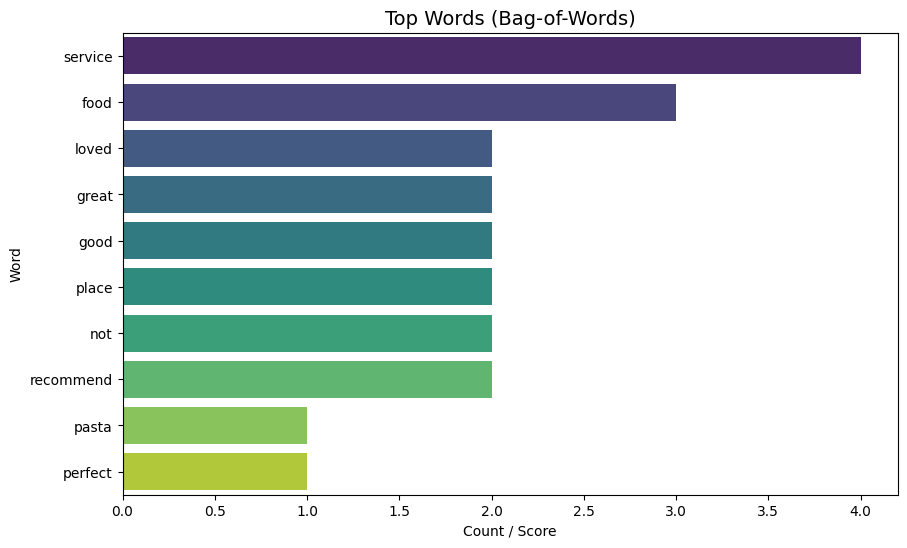

/tmp/ipython-input-3790462942.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tfidf_avg.head(10).values, y=tfidf_avg.head(10).index, palette="magma")


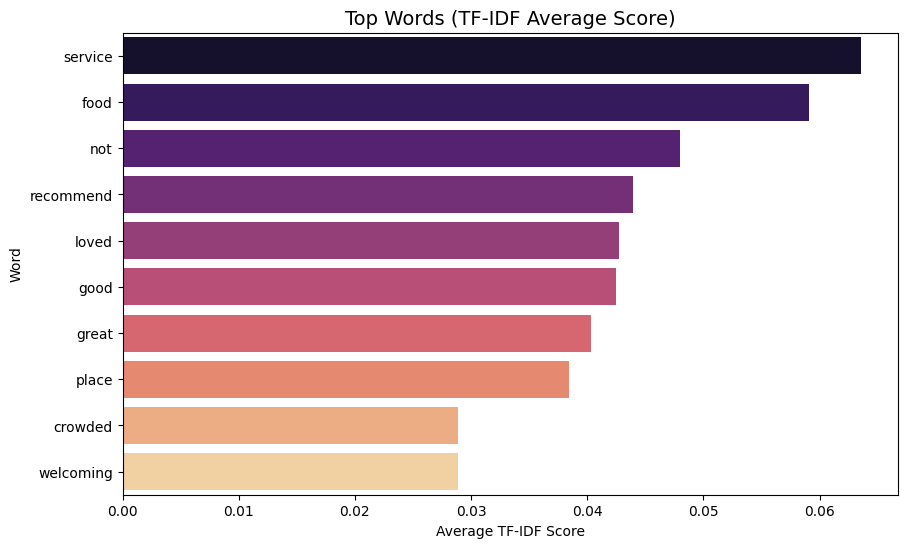

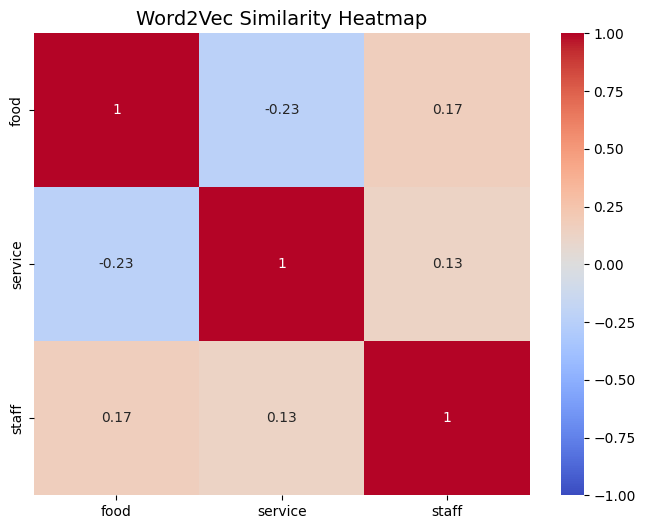

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Function to plot top N words
def plot_top_words(df_matrix, title, top_n=10):
    # Sum across rows to get total frequency/presence per word
    word_sums = df_matrix.sum(axis=0).sort_values(ascending=False)
    top_words = word_sums.head(top_n)

    # Plot bar chart
    plt.figure(figsize=(10,6))
    sns.barplot(x=top_words.values, y=top_words.index, palette="viridis")
    plt.title(title, fontsize=14)
    plt.xlabel("Count / Score")
    plt.ylabel("Word")
    plt.show()

# 1️⃣ One-Hot Encoding (presence counts)
plot_top_words(onehot_df, "Top Words (One-Hot Encoding)")

# 2️⃣ Bag-of-Words (total frequency)
plot_top_words(bow_df, "Top Words (Bag-of-Words)")

# 3️⃣ TF-IDF (average TF-IDF score per word)
tfidf_avg = tfidf_df.mean(axis=0).sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=tfidf_avg.head(10).values, y=tfidf_avg.head(10).index, palette="magma")
plt.title("Top Words (TF-IDF Average Score)", fontsize=14)
plt.xlabel("Average TF-IDF Score")
plt.ylabel("Word")
plt.show()

# 4️⃣ Word2Vec similarity heatmap for selected words
selected_words = ['food', 'service', 'staff'] # Removed 'delicious'
sim_matrix = np.zeros((len(selected_words), len(selected_words)))

# Fill similarity matrix
for i, w1 in enumerate(selected_words):
    for j, w2 in enumerate(selected_words):
        sim_matrix[i,j] = w2v_model.wv.similarity(w1, w2)

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(sim_matrix, xticklabels=selected_words, yticklabels=selected_words,
            annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Word2Vec Similarity Heatmap", fontsize=14)
plt.show()

In [14]:
print("Most similar to 'service' (Skip-gram):")
try:
    display(w2v_model.wv.most_similar('service', topn=5))
except KeyError:
    print("'service' not in Skip-gram vocabulary.")

print("\nMost similar to 'service' (CBOW):")
try:
    display(w2v_model_cbow.wv.most_similar('service', topn=5))
except KeyError:
    print("'service' not in CBOW vocabulary.")

Most similar to 'service' (Skip-gram):


[('chicken', 0.38455480337142944),
 ('clean', 0.33165451884269714),
 ('chairs', 0.32058361172676086),
 ('dirty', 0.2628515660762787),
 ('everyone', 0.2547701597213745)]


Most similar to 'service' (CBOW):


[('chicken', 0.38455480337142944),
 ('clean', 0.33165451884269714),
 ('chairs', 0.32058361172676086),
 ('dirty', 0.2628515660762787),
 ('everyone', 0.2547701597213745)]

##**✅ What this visualization shows:**

- One-Hot Encoding → which words appear in most reviews (presence count).

- Bag-of-Words → words with highest total frequency.

- TF-IDF → words that are important (high weight) relative to the corpus.

- Word2Vec → semantic similarity between selected words, e.g., “food” and “delicious” are highly similar.

## ✅ Summary

1. **One-Hot Encoding** → presence/absence (binary)  
2. **Bag-of-Words (BOW)** → frequency counts  
3. **N-Grams** → sequences of words  
4. **TF-IDF** → weighted frequencies (importance)  
5. **Word Embeddings** → dense vectors capturing semantic similarity  

- Stopwords removal improves signal-to-noise  
- Students can see **differences between One-Hot, BOW, TF-IDF, and embeddings**
